In [51]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['axes.unicode_minus'] = False

In [140]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [141]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
df.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


최대값 변경여부 : 시력,혈청크레아티닌,중성 지방,저밀도지단백,요단백,간효소율

In [41]:
col = ['시력','혈청 크레아티닌','중성 지방','저밀도지단백','요 단백','간 효소율']



Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)   
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
higher = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 시력           0.80
혈청 크레아티닌     0.80
중성 지방       74.00
저밀도지단백      92.00
요 단백         1.00
간 효소율        0.84
Name: 0.25, dtype: float64
Q3: 시력            1.20
혈청 크레아티닌      1.00
중성 지방       161.00
저밀도지단백      136.00
요 단백          1.00
간 효소율         1.38
Name: 0.75, dtype: float64
IQR: 시력           0.40
혈청 크레아티닌     0.20
중성 지방       87.00
저밀도지단백      44.00
요 단백         0.00
간 효소율        0.54
dtype: float64


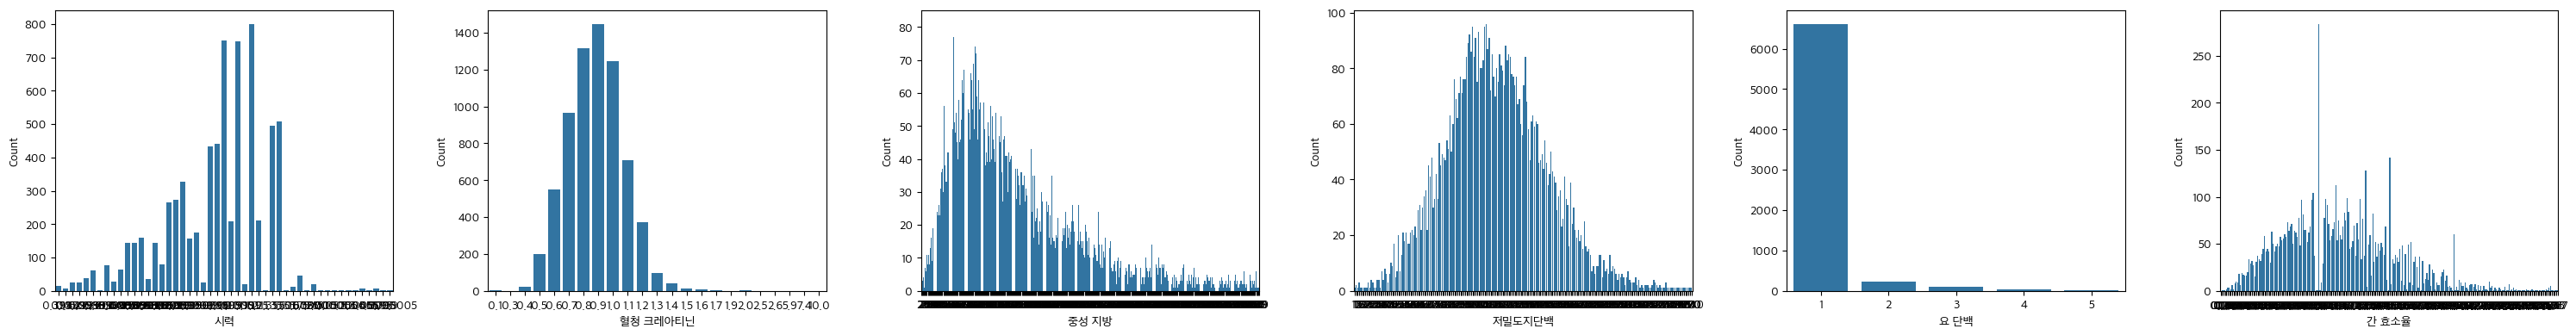

In [49]:
col = ['시력','혈청 크레아티닌','중성 지방','저밀도지단백','요 단백','간 효소율']
fig, axs = plt.subplots(1, len(col), figsize=(5 * len(col), 4))

if len(col) == 1:
    axs = [axs]  

for i, c in enumerate(col):
    sns.countplot(x=c, data=df, ax=axs[i])
    axs[i].set_xlabel(c)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

----

In [ ]:
#시력 2이상,크레아티닌 1.5이상 요단백 4이상

df.loc[df['시력'] > 2, '시력'] = 2.0
df.loc[df['혈청 크레아티닌'] > 1.5, '혈청 크레아티닌'] = 1.5
df.loc[df['요 단백'] > 4, '요 단백'] = 4.0

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         7000 non-null   object  
 1   나이         7000 non-null   int64   
 2   키(cm)      7000 non-null   int64   
 3   몸무게(kg)    7000 non-null   int64   
 4   BMI        7000 non-null   float64 
 5   시력         7000 non-null   float64 
 6   충치         7000 non-null   int64   
 7   공복 혈당      7000 non-null   int64   
 8   혈압         7000 non-null   int64   
 9   중성 지방      7000 non-null   int64   
 10  혈청 크레아티닌   7000 non-null   float64 
 11  콜레스테롤      7000 non-null   int64   
 12  고밀도지단백     7000 non-null   int64   
 13  저밀도지단백     7000 non-null   int64   
 14  헤모글로빈      7000 non-null   float64 
 15  요 단백       7000 non-null   int64   
 16  간 효소율      7000 non-null   float64 
 17  label      7000 non-null   int64   
 18  age_group  7000 non-null   category
 19  BMI_group  7000 non-null   

In [143]:
X = df.drop(['ID','label'], axis = 1)
y = df['label']

x_test = test.drop('ID', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

In [137]:
from sklearn.model_selection import GridSearchCV

In [144]:
parms = {
    'n_estimators':[50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True],
    'oob_score':[True]


}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42
    ),
    param_grid=parms,
    n_jobs=-1,
    verbose=1, 
    scoring='accuracy'
)

In [145]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200], 'oob_score': [True]},
             scoring='accuracy', verbose=1)

In [146]:
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

best_model = grid.best_estimator_
test_acc = accuracy_score(y_valid, best_model.predict(X_valid))
print("Test Accuracy:", test_acc)

Best params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Best CV score: 0.7358928571428571
Test Accuracy: 0.7157142857142857


In [ ]:

pred = best_model.predict(x_test)
submit = pd.read_csv('sample_submission.csv')
submit['label'] = pred
submit.head()
submit.to_csv('submission.csv', index = False)

In [148]:
submit.head()

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,0


In [100]:
df

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0


In [101]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['나이'], bins=age_bins, labels=age_labels, right=False)

BMI_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
BMI_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['BMI_group'] = pd.cut(df['BMI'], bins=BMI_bins, labels=BMI_labels, right=False)
df['나이별_BMI구간'] = df['age_group'].astype(str) + '_' + df['BMI_group'].astype(str)

print(df[['나이', 'BMI', 'age_group', 'BMI_group', '나이별_BMI구간']])

      나이    BMI age_group      BMI_group            나이별_BMI구간
0     35  24.22     30-39  Normal weight  30-39_Normal weight
1     40  24.44     40-49  Normal weight  40-49_Normal weight
2     60  17.30     60-69    Underweight    60-69_Underweight
3     40  20.00     40-49  Normal weight  40-49_Normal weight
4     55  27.06     50-59     Overweight     50-59_Overweight
...   ..    ...       ...            ...                  ...
6995  25  22.49     20-29  Normal weight  20-29_Normal weight
6996  60  23.88     60-69  Normal weight  60-69_Normal weight
6997  40  30.86     40-49      Obesity I      40-49_Obesity I
6998  60  24.44     60-69  Normal weight  60-69_Normal weight
6999  50  23.88     50-59  Normal weight  50-59_Normal weight

[7000 rows x 5 columns]


In [111]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
age_bmi_bins = ohe.fit_transform(df[["나이별_BMI구간"]])

In [ ]:
age_bmi_bins_df = pd.DataFrame(
    age_bmi_bins,
    columns=ohe.get_feature_names_out(["나이별_BMI구간"])
)

In [116]:
age_bmi_bins_df.index = df.index

In [117]:
df_final = pd.concat(
    [df.drop(columns=["나이별_BMI구간"]), age_bmi_bins_df],
    axis=1
)

In [120]:
df_final

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,...,나이별_BMI구간_60-69_Obesity II,나이별_BMI구간_60-69_Overweight,나이별_BMI구간_60-69_Underweight,나이별_BMI구간_70-79_Normal weight,나이별_BMI구간_70-79_Obesity I,나이별_BMI구간_70-79_Overweight,나이별_BMI구간_70-79_Underweight,나이별_BMI구간_80-89_Normal weight,나이별_BMI구간_80-89_Overweight,나이별_BMI구간_80-89_Underweight
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
